<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-04-11 13:47:28--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  18.0MB/s    in 1.9s    

2023-04-11 13:47:31 (18.0 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [21]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [8]:
# print how many rows are there in the table named 'master'
QUERY = "SELECT COUNT(*)FROM master"

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [9]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [10]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

In [24]:
#Devtype
QUERY = """
SELECT DevType, count(*) as Num FROM DevType
group by DevType order by Num desc
"""

df = pd.read_sql_query(QUERY,conn)
df

,DevType,Num
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959
5,DevOps specialist,1639
6,Database administrator,1413
7,System administrator,1202
8,Designer,988
9,"Developer, QA or test",911


# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [15]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


<AxesSubplot:ylabel='Frequency'>

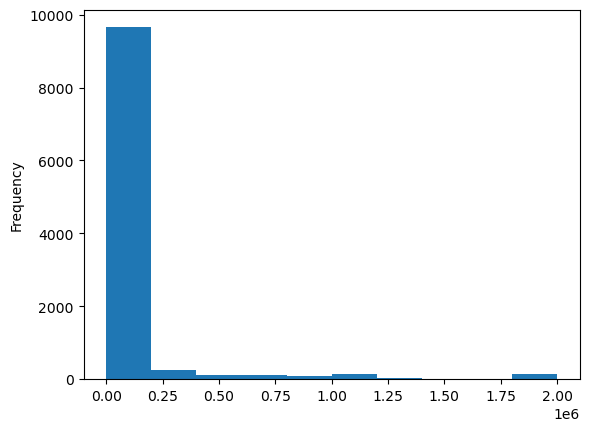

In [18]:
# your code goes here
# print how many rows are there in the table named 'master'
QUERY = "SELECT * FROM master"

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()
#plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())
#type(income_vs_hardship)
df['ConvertedComp'].plot(kind='hist')

### Box Plots


Plot a box plot of `Age.`


In [20]:
# your code goes here
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


<AxesSubplot:>

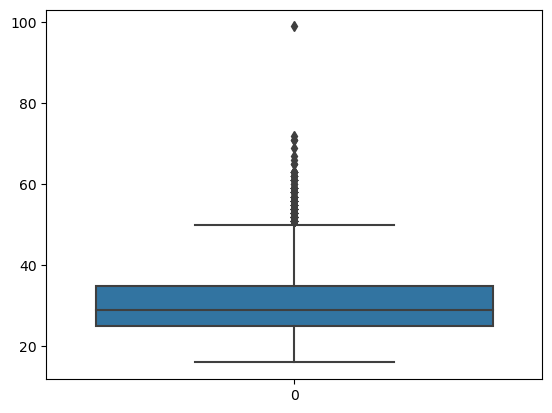

In [21]:
sns.boxplot(data=df['Age'])

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


In [9]:
# your code goes here
import numpy as np
import matplotlib.pyplot as plt

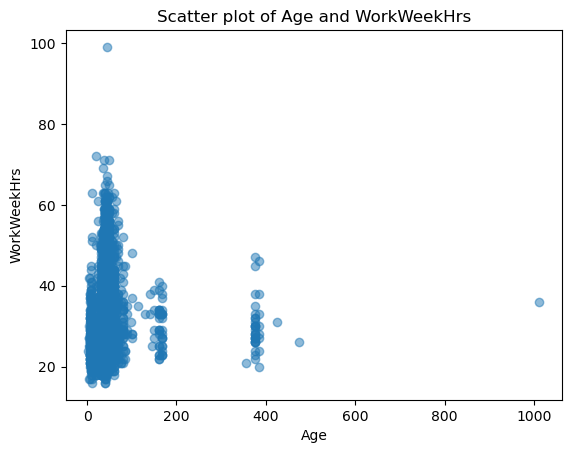

In [24]:
# Plot
plt.scatter(df['WorkWeekHrs'], df['Age'], alpha=0.5)
plt.title('Scatter plot of Age and WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.show()

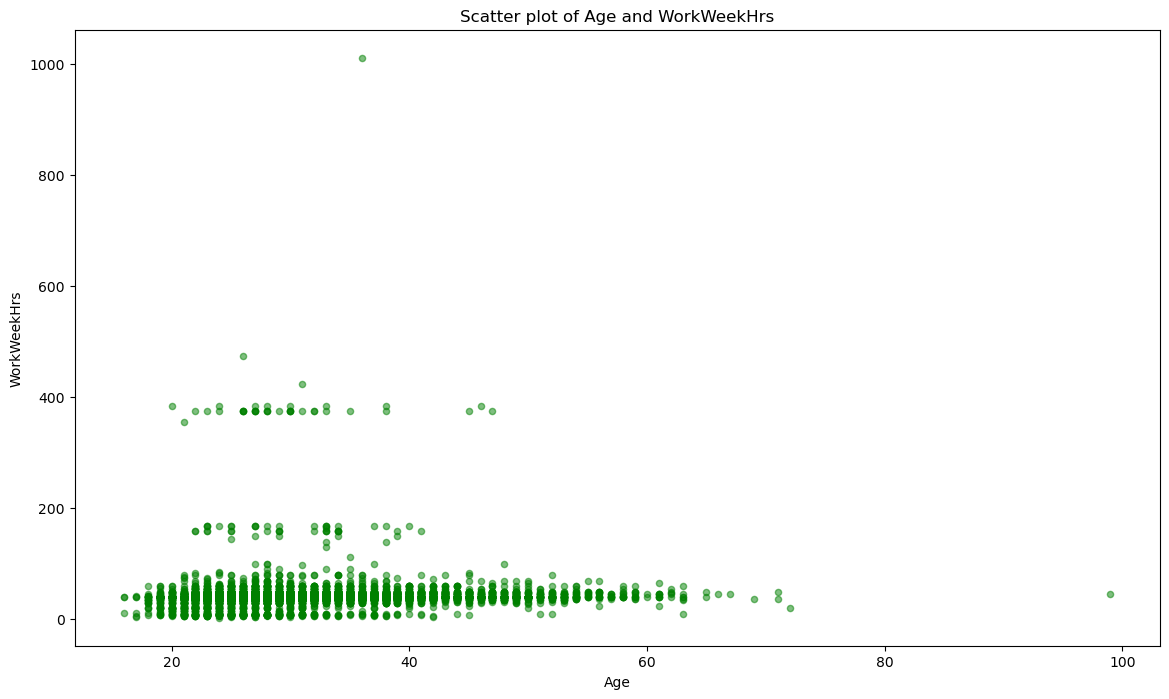

In [37]:
#Method 2 with
df1=df[['Age','WorkWeekHrs']]
ax = df1.plot(kind='scatter',
                    x='Age',
                    y='WorkWeekHrs',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green'
                    #s=norm_brazil * 2000 + 10,  # pass in weights 
                    #xlim=(1975, 2015)
                    )
plt.title('Scatter plot of Age and WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')

plt.show()

In [33]:
df1

,Age,WorkWeekHrs
0,22.0,80.0
1,23.0,32.0
2,28.0,40.0
3,26.0,40.0
4,29.0,45.0
...,...,...
11393,36.0,40.0
11394,25.0,40.0
11395,34.0,40.0
11396,25.0,42.5


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


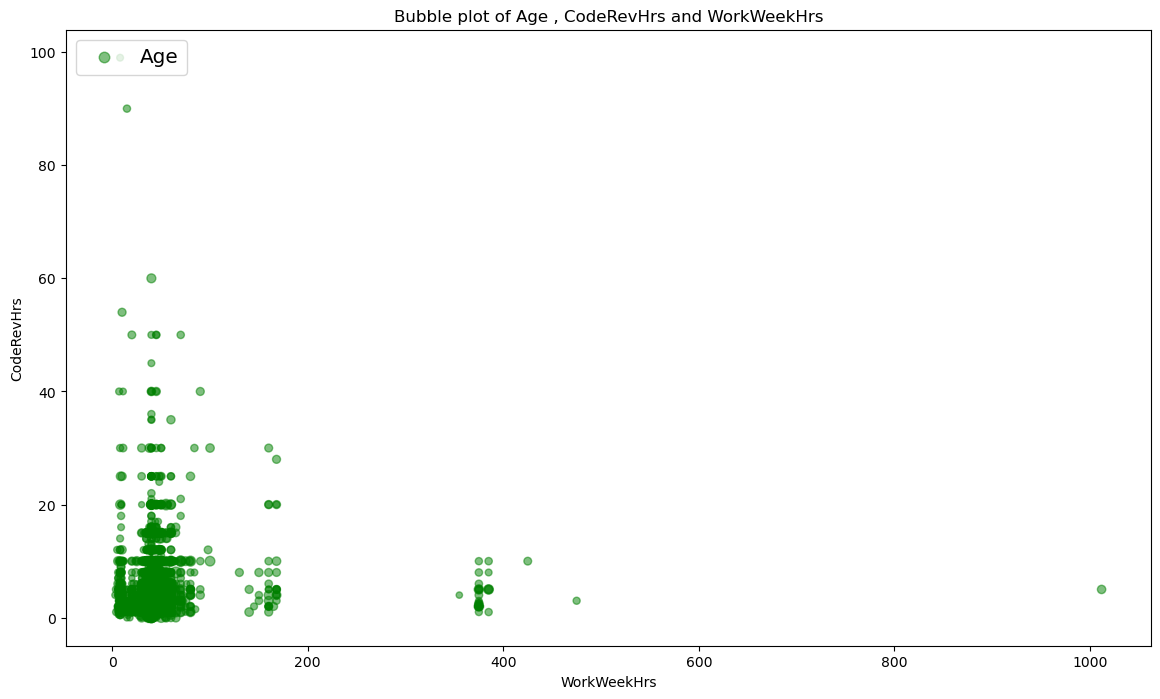

0        22.0
1        23.0
2        28.0
3        26.0
4        29.0
         ... 
11393    36.0
11394    25.0
11395    34.0
11396    25.0
11397    30.0
Name: Age, Length: 11398, dtype: float64

In [90]:
# your code goes here
# normalize Brazil data
age_size = df['Age']
#df1=df[['Age','WorkWeekHrs']]
ax = df.plot(kind='scatter',
                    x='WorkWeekHrs',
                    y='CodeRevHrs',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=age_size
                    #,xlim=(1975, 2015)
                    )
plt.title('Bubble plot of Age , CodeRevHrs and WorkWeekHrs')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.legend(['Age'], loc='upper left', fontsize='x-large')
plt.show()
age_size

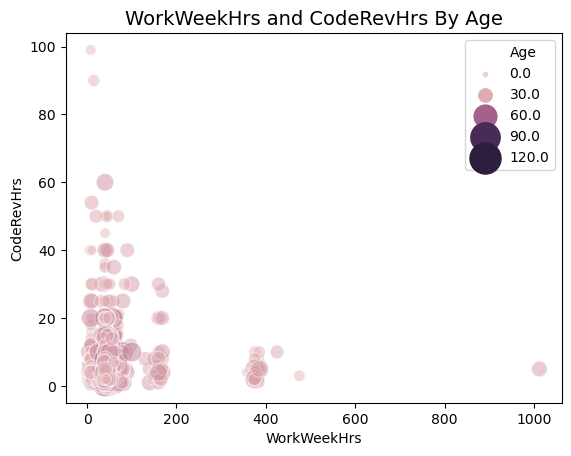

In [89]:
#Method
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age FROM master
"""
df1=pd.read_sql_query(QUERY,conn)

sns.scatterplot(data=df1, x='WorkWeekHrs', y='CodeRevHrs', size='Age', hue='Age', alpha=0.5, sizes=(10, 500)) 

plt.title('WorkWeekHrs and CodeRevHrs By Age', size=14) 
plt.xlabel('WorkWeekHrs', size=10) 
plt.ylabel('CodeRevHrs', size=10)

plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [69]:
# your code goes here
QUERY = """
SELECT LanguageDesireNextYear, count (*) as Num FROM LanguageDesireNextYear
group by LanguageDesireNextYear order by Num desc limit 5
"""

df_nextLang = pd.read_sql_query(QUERY,conn)
#df_nextDLang.set_index('DatabaseDesireNextYear', inplace=True)
df_nextLang

,LanguageDesireNextYear,Num
0,JavaScript,6630
1,HTML/CSS,5328
2,Python,5239
3,SQL,5012
4,TypeScript,4088


In [ ]:
QUERY = """
SELECT LanguageDesireNextYear, count (*) as Num FROM LanguageDesireNextYear
group by LanguageDesireNextYear order by Num desc limit 5
"""

df_nextLang = pd.read_sql_query(QUERY,conn)
#df_nextDLang.set_index('DatabaseDesireNextYear', inplace=True)
df_nextLang

In [87]:
# your code goes here
QUERY = """
SELECT count (*) as Num FROM DatabaseWorkedwith
where DatabaseWorkedwith in ('SQLite' , 'Microsoft SQL Server')
"""

df_DB = pd.read_sql_query(QUERY,conn)
#df_DB.set_index('DatabaseDesireNextYear', inplace=True)
df_DB

,Num
0,7358


In [85]:
QUERY = """
select count(*) from
    (SELECT *, count (*) as Num FROM DatabaseWorkedwith
    group by Respondent having Num =1 and DatabaseWorkedwith='MySQL')
"""

df_DB = pd.read_sql_query(QUERY,conn)
#df_DB.set_index('DatabaseDesireNextYear', inplace=True)
df_DB

,count(*)
0,474


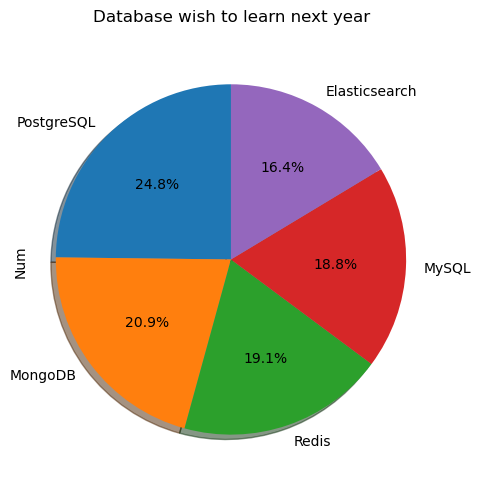

In [63]:

df_nextDB['Num'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° 
                            shadow=True       # add shadow      
                            )

plt.title('Database wish to learn next year')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [67]:
# your code goes here
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age FROM master
Where Age in (30,35)
"""

df_Age30_35 = pd.read_sql_query(QUERY,conn)
#df_Age30_35.set_index('DatabaseDesireNextYear', inplace=True)
df_Age30_35


,WorkWeekHrs,CodeRevHrs,Age
0,38.0,2.0,35.0
1,40.0,5.0,30.0
2,50.0,4.0,30.0
3,40.0,4.0,35.0
4,45.0,8.0,30.0
...,...,...,...
1039,42.0,2.0,30.0
1040,40.0,8.0,35.0
1041,48.0,5.0,35.0
1042,38.0,7.0,35.0


In [96]:
QUERY = """
SELECT (WorkWeekHrs), (CodeRevHrs), Age FROM master
WHERE Age BETWEEN 30 AND 35 
"""
df_age = pd.read_sql_query(QUERY,conn)
df_age = df_age.groupby('Age').median()
df_age

,WorkWeekHrs,CodeRevHrs
Age,,
30.0,40.0,4.0
31.0,40.0,4.0
32.0,40.0,4.0
33.0,40.0,4.0
34.0,40.0,4.0
35.0,40.0,4.0


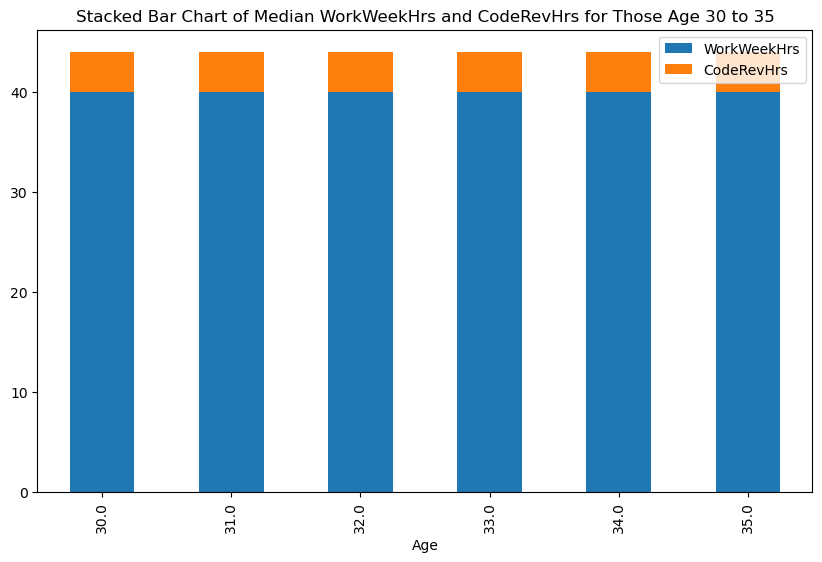

In [97]:
df_age.plot(kind='bar', figsize=(10, 6), stacked=True)

plt.title('Stacked Bar Chart of Median WorkWeekHrs and CodeRevHrs for Those Age 30 to 35')
plt.show()


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [6]:
# your code goes here
QUERY1 = """
SELECT ConvertedComp, Age FROM master
WHERE Age BETWEEN 45 AND 60 
"""
df_age4560 = pd.read_sql_query(QUERY1,conn)
df_age4560 = df_age4560.groupby('Age').median()
df_age4560


,ConvertedComp
Age,
45.0,90330.0
46.0,91593.0
47.0,91606.0
48.0,105750.0
49.0,85248.0
50.0,95000.0
51.0,100000.0
52.0,105500.0
53.0,100463.0


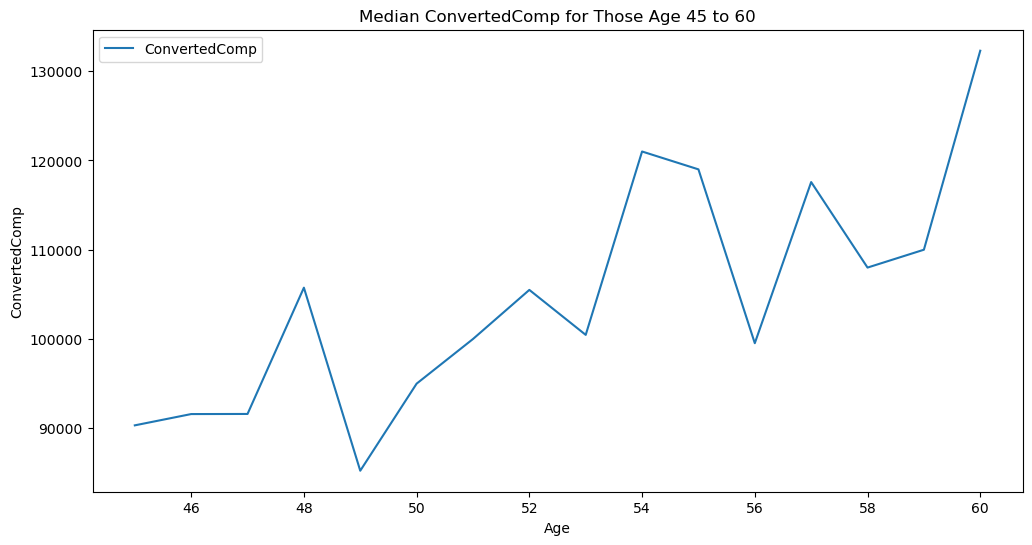

In [11]:
df_age4560.plot(kind='line',  figsize=(12, 6))
plt.title('Median ConvertedComp for Those Age 45 to 60')
plt.ylabel('ConvertedComp')
plt.show()

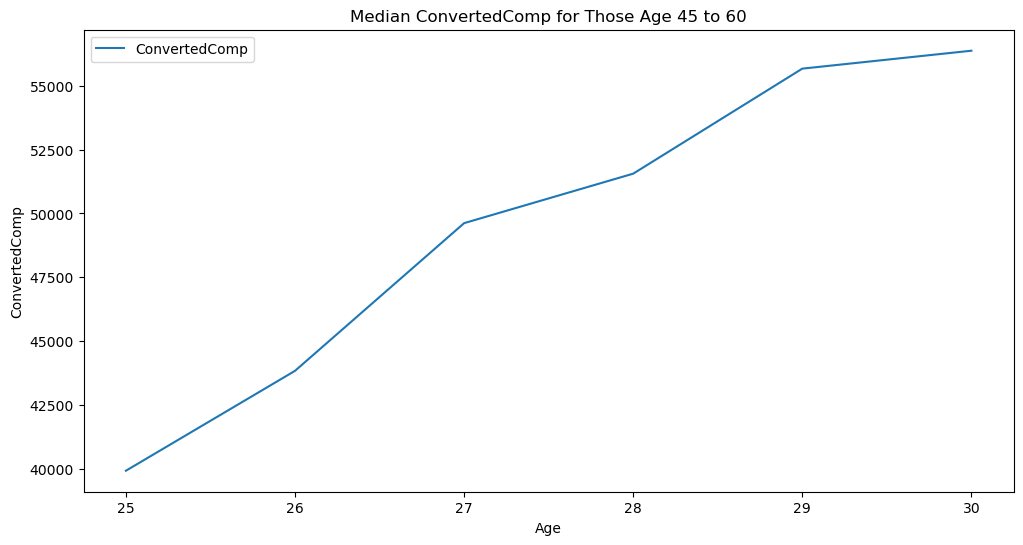

In [26]:
#Line Chart of Age and median ConvertedComp for the age group 25-30
QUERY1 = """
SELECT ConvertedComp, Age FROM master
WHERE Age BETWEEN 25 AND 30
"""
df_age2530 = pd.read_sql_query(QUERY1,conn)
df_age2530 = df_age2530.groupby('Age').median()
df_age2530

df_age2530.plot(kind='line',  figsize=(12, 6))
plt.title('Median ConvertedComp for Those Age 45 to 60')
plt.ylabel('ConvertedComp')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [14]:
# your code goes here
QUERY = """
SELECT MainBranch, COUNT(*) as Num
from master
group by MainBranch
"""

df_main=pd.read_sql_query(QUERY,conn)
df_main.head()

,MainBranch,Num
0,I am a developer by profession,10618
1,"I am not primarily a developer, but I write co...",780


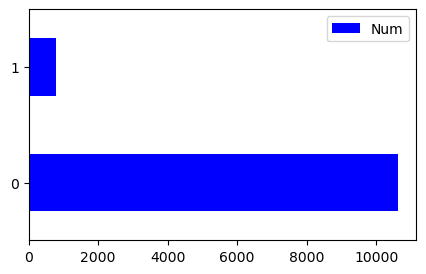

In [18]:
df_main.plot(kind='barh', figsize=(5,3), color='blue')
plt.show()

Close the database connection.


In [19]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
